# Advanced Lane Lines Finding 

In this project our goal is to write a software pipeline to identify the road lane lines in a video from a front-facing camera on a car. We will detect and calculate curved line as well as detecting the relative position of the car with regard to the center of the road. In order to acheive this here is our action plan :

1. Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
2. Apply a distortion correction to raw images.
3. Use color transforms, gradients, etc., to create a thresholded binary image.
4. Apply a perspective transform to rectify binary image ("birds-eye view").
5. Detect lane pixels and fit to find the lane boundary.
6. Determine the curvature of the lane and vehicle position with respect to center.
7. Warp the detected lane boundaries back onto the original image.
8. Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

## 1. Camera Calibration

### Imports

Thanks to OpenCV most of the function needed for us to Calibrating our camera will be native OpenCV function , lets do our imports!

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

### Define our calibration function

In order for use to calibrate our camera we will use a chessboard of wich we know the dimensions and number of intercection.
The number of corners in any given row will be noted nx. Similarly,the number of corners in a given column will be noted ny.
Taking different picture of the chessboard under different angles we will allow us to calibrate our camera.

In [39]:
def camera_calibration(images, nx, ny):
    
    #Prepare object points
    objp = np.zeros((ny*nx, 3), np.float32)
    objp[:, :2] = np.mgrid[0:nx, 0:ny].transpose().reshape(-1, 2)
    objpoints = []
    imgpoints = []
    
    for sample_img in images:
        
        #read image
        img = cv2.imread(sample_img)       
        #get image size
        img_size = (img.shape[1], img.shape[0])  
        #convert our image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)      
        #find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
        #if corners found
        if ret:
            objpoints.append(objp)
            imgpoints.append(corners)
    
    #calculate the camera calibration matrix and the distortion coefficient based on our objectpoint and image points
    ret, mtx, dist, _, _ = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)   
    return mtx, dist

In [40]:
images = glob.glob("camera_cal/calibration*.jpg")
mtx, dist = camera_calibration(images, 9, 6)

Now that we have been calculating the calibration matrix and the distortion coefficients we can know undistorted image comming from the camera.

### 2. Image distortion
Lets use the previous calibration matrix and the distortion coefficients to build an image undistort function

In [47]:
def undistort(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

### Apply a distortion correction to a raw image

(-0.5, 1279.5, 719.5, -0.5)

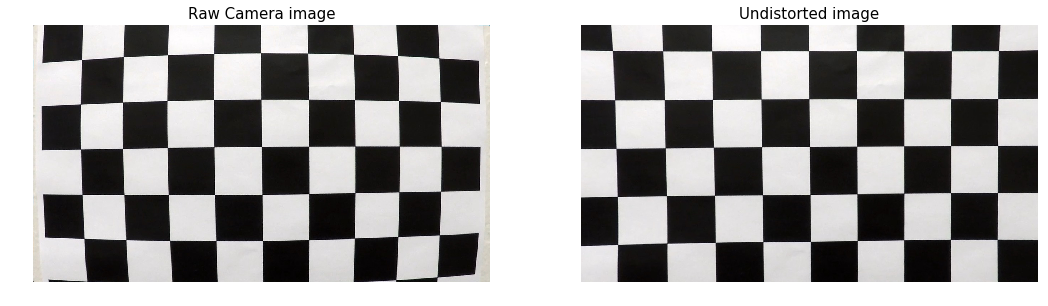

In [51]:
#Lets apply a distortion correction to a raw image and check the result
img = plt.imread("camera_cal/calibration1.jpg")
undist_img = undistort(img)

fig = plt.figure(figsize=(18, 10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Raw Camera image',fontsize=15)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(undist_img)
plt.title('Undistorted image',fontsize=15)
plt.axis('off')

We can know undistort images from the camera and start to work on our pipeline !